In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
# Вопрос 1: Какое количество мужчин и женщин ехало на корабле?

sex_counts = data['Sex'].value_counts()
male_count = sex_counts['male']
female_count = sex_counts['female']
print(f'Количество мужчин: {male_count}, Количество женщин: {female_count}')

Количество мужчин: 577, Количество женщин: 314


In [4]:
# Вопрос 2: Какой части пассажиров удалось выжить? 
# Посчитайте долю выживших пассажиров в процентах (округленную до двух знаков)

survived_percentage = (data['Survived'].sum() / len(data)) * 100
print(f'Доля выживших пассажиров: {survived_percentage:.2f}%')

Доля выживших пассажиров: 38.38%


In [5]:
# Вопрос 3: Какую долю пассажиры первого класса составляли среди всех пассажиров?

first_class_percentage = (data[data['Pclass'] == 1].shape[0] / len(data)) * 100
print(f'Доля пассажиров первого класса: {first_class_percentage:.2f}%')

Доля пассажиров первого класса: 24.24%


In [6]:
# Вопрос 4: Какого возраста были пассажиры? Посчитайте среднее и медиану возраста.

mean_age = data['Age'].mean()
median_age = data['Age'].median()
print(f'Средний возраст: {mean_age:.2f}, Медианный возраст: {median_age:.2f}')

Средний возраст: 29.70, Медианный возраст: 28.00


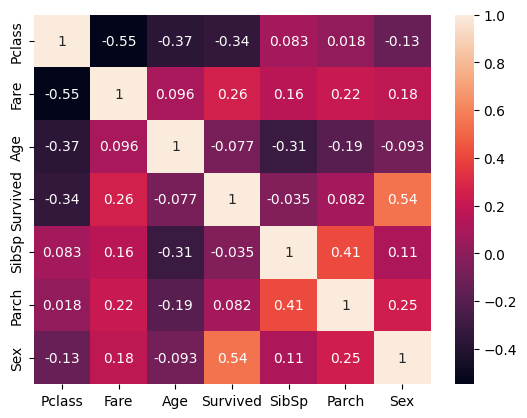

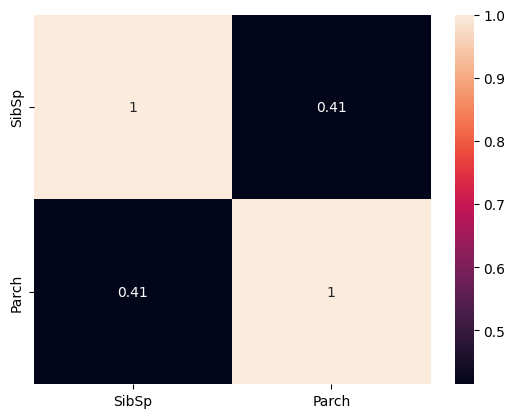

Корреляция между SibSp и Parch:
          SibSp     Parch
SibSp  1.000000  0.414838
Parch  0.414838  1.000000


In [7]:
# Вопрос 5: Коррелируют ли число братьев/сестер с числом родителей/детей?

result = data[['SibSp', 'Parch']].corr()
sub_data = pd.DataFrame.copy(data[['Pclass', 'Fare', 'Age', 'Survived', 'SibSp', 'Parch', 'Sex']])
sub_data['Sex'] = sub_data.Sex.map({'male': 0, 'female': 1})

sub_data_corr = sub_data[['Pclass', 'Fare', 'Age', 'Survived', 'SibSp', 'Parch', 'Sex']].corr()
sns.heatmap(sub_data_corr, annot=True, xticklabels=sub_data_corr.columns.values, yticklabels=sub_data_corr.columns.values)
plt.show()

sub_data_corr = sub_data[['SibSp', 'Parch']].corr()
sns.heatmap(sub_data_corr, annot=True, xticklabels=sub_data_corr.columns.values, yticklabels=sub_data_corr.columns.values)
plt.show()

print(f'Корреляция между SibSp и Parch:\n{result}')

In [9]:
# Вопрос 6: Какое самое популярное женское имя на корабле?

filtered_data = data.loc[data['Sex'] == 'female'].Name
prefixes = ['Mrs. ', 'Miss. ', 'Ms. ']
first_names = []

def extract_first_name(name):
    if '(' in name:
        if '("' in name:
            return name.split(prefix)[1].split(' ')[0]
        short_name = re.sub(r'\W+', '', name[name.find('(')+1:name.find(')')].split(' ', 1)[0])
    else:
        short_name = name.split(prefix)[1].split(' ')[0]
    return short_name

for name in filtered_data:
    short_name = None
    for prefix in prefixes:
        if prefix in name:
            short_name = extract_first_name(name)
            first_names.append(short_name)
            break
        
name_counts = pd.Series(first_names).value_counts()
print(name_counts)
most_popular_name = name_counts.idxmax()
count_of_most_popular_name = name_counts.max()

print(f'Самое популярное имя: {most_popular_name}, Количество: {count_of_most_popular_name}')

Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         6
             ..
Miriam        1
Helmina       1
Laura         1
Nora          1
Gerda         1
Name: count, Length: 174, dtype: int64
Anna
Самое популярное имя: Anna, Количество: 15
